<h1>Statistical Data Analysis <h1\>

In [189]:
import requests
import pandas as pd

data = requests.get(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv').text

with open('dataset.csv', 'w', encoding="utf-8") as f:#'w' means opens for recording.
    f.write(data)
data = pd.read_csv('dataset.csv', sep=',')
# It shows how many rows and columns the dataset has.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [190]:
import sqlite3
conn = sqlite3.connect('sql_step_project.db', check_same_thread=False, )
cursor = conn.cursor()

def delete_table():
    cursor.execute("DROP TABLE IF EXISTS all_data")
delete_table()   
    
columns = ','.join(['"' + col + '"' + ' ' + 'TEXT' for col in data.columns])

def creationandfilingDB():
    cursor.execute(f"""CREATE TABLE IF NOT EXISTS all_data ({columns})""")

    for x in data.values:
        cursor.execute("""INSERT INTO all_data VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?)""",(x))
        conn.commit()

# Creating and Populating a Database
creationandfilingDB()

<h2>Category<h2\>

In [191]:
# a query to select the category column.
cursor.execute("""SELECT category
                FROM all_data_without_duplicate""")
exer1= cursor.fetchall()
exer1=pd.DataFrame(exer1,columns=['category'])
# Descriptive statistics of the category dataset
print(exer1.describe())

                          category
count                         2962
unique                          17
top     Bookcases & shelving units
freq                           548


In [193]:
# The number of products in each category
count_category = exer1['category'].value_counts()
# Sorting in descending order
count_category = count_category.sort_values(ascending=False)
print(count_category)

Bookcases & shelving units              548
Chairs                                  438
Sofas & armchairs                       380
Tables & desks                          370
Wardrobes                               220
Beds                                    208
Outdoor furniture                       197
Cabinets & cupboards                    187
Chests of drawers & drawer units        111
TV & media furniture                     89
Children's furniture                     84
Bar furniture                            47
Trolleys                                 23
Nursery furniture                        22
Café furniture                           18
Sideboards, buffets & console tables     10
Room dividers                            10
Name: category, dtype: int64


Text(0.5, 1.0, 'the distribution histogram')

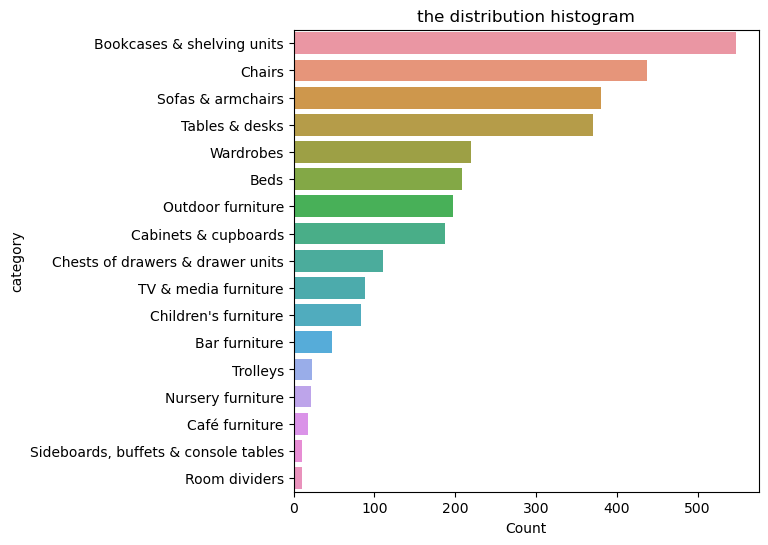

In [194]:
#Constructing a histogram for the category.
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=count_category.values,y=count_category.index)
ax.set_ylabel('category')
ax.set_xlabel('Count')
ax.set_title('the distribution histogram')


<h2>Price<h2\>

In [195]:
# A query to select the price column
cursor.execute("""SELECT price
                FROM all_data_without_duplicate""")
exer2= cursor.fetchall()
exer2=pd.DataFrame(exer2,columns=['price'])
exer2['price'] = exer2['price'].astype(float)
# Descriptive statistics of the price dataset
print(exer2.describe().round(2))

         price
count  2962.00
mean   1108.72
std    1393.58
min       3.00
25%     200.00
50%     570.00
75%    1475.00
max    9585.00


In [196]:
# Let's find the mode for the price.
from statistics import mode

mode = mode(exer2['price'])
print('mode ',mode) 

mode  395.0


Text(0.5, 1.0, 'the distribution histogram')

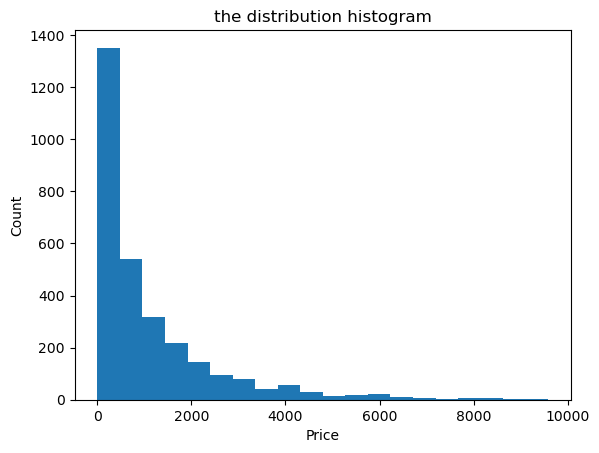

In [197]:
fig,ax=plt.subplots()
ax.hist(exer2['price'], bins=20)
ax.set_xlabel('Price')
ax.set_ylabel('Count')
ax.set_title('the distribution histogram')

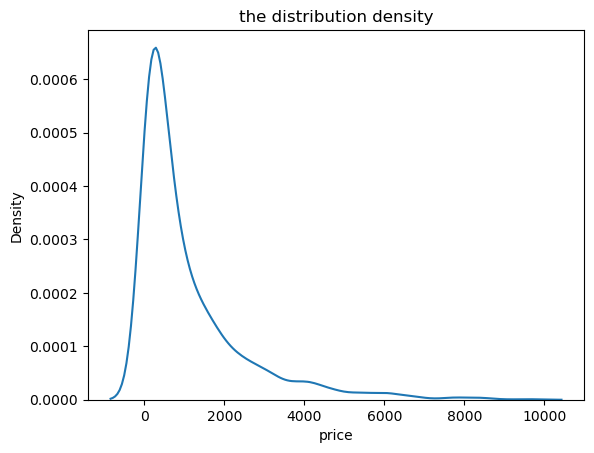

In [198]:
#A density plot of the price data
fig,ax=plt.subplots()
sns.kdeplot(exer2['price'])
ax.set_title('the distribution density')
plt.show()

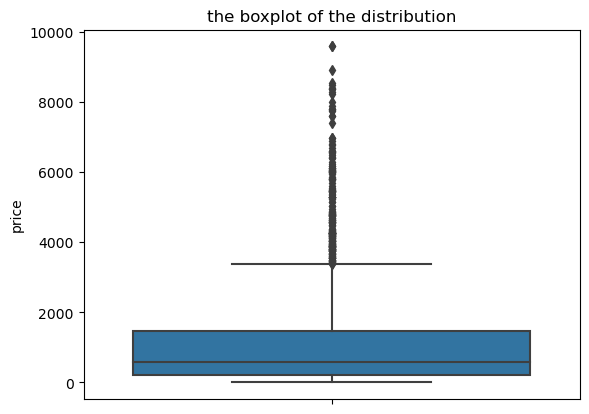

In [199]:
#building boxplot price
fig,ax=plt.subplots()
sns.boxplot(y ='price', data=exer2)
ax.set_title('the boxplot of the distribution')
plt.show()


<h2>Designer<h2\>

In [200]:
# A query to select designer column
cursor.execute("""SELECT designer
                FROM all_data_without_duplicate
                WHERE designer!=''""")
exer1_1= cursor.fetchall()
exer1_1=pd.DataFrame(exer1_1,columns=['designer'])
# Descriptive statistics of the category dataset
print(exer1_1.describe())

              designer
count             2860
unique             279
top     IKEA of Sweden
freq               683


In [201]:
# The number of products by designer
count_designer = exer1_1['designer'].value_counts()
count_designer

IKEA of Sweden                                        683
Ehlén Johansson                                       136
Francis Cayouette                                     131
Ola Wihlborg                                          128
Jon Karlsson                                          106
                                                     ... 
E Thomasson/P Süssmann                                  1
Ehlén Johansson/K Hagberg/M Hagberg/IKEA of Sweden      1
Ola Wihlborg/Ehlén Johansson/IKEA of Sweden             1
Mia Lagerman/IKEA of Sweden/Wiebke Braasch              1
K Hagberg/M Hagberg/Francis Cayouette                   1
Name: designer, Length: 279, dtype: int64

In [202]:
# Designers that appear only once in the data
min_value = count_designer.min()
min_indices = count_designer[count_designer == min_value].index
print(min_indices)

Index(['Johanna Jelinek', 'IKEA of Sweden/Virgil Abloh',
       'IKEA of Sweden/K Hagberg/M Hagberg/Ehlén Johansson',
       'Monika Mulder/IKEA of Sweden',
       'Johanna Asshoff/IKEA of Sweden/Gustav Carlberg',
       'Francis Cayouette/Nike Karlsson',
       'David Wahl/IKEA of Sweden/John/Jonas/Petrus/Paul/Caroline',
       'Ola Wihlborg/Synnöve Mork/IKEA of Sweden',
       'IKEA of Sweden/Anna Efverlund', 'Magnus Elebäck',
       ...
       'Francis Cayouette/Jomi Evers', 'Mia Lagerman/Ehlén Johansson',
       'K Hagberg/M Hagberg/John/Jonas/Petrus/Paul/Caroline',
       'Studio Copenhagen/Mia Lagerman', 'IKEA of Sweden/Nike Karlsson',
       'E Thomasson/P Süssmann',
       'Ehlén Johansson/K Hagberg/M Hagberg/IKEA of Sweden',
       'Ola Wihlborg/Ehlén Johansson/IKEA of Sweden',
       'Mia Lagerman/IKEA of Sweden/Wiebke Braasch',
       'K Hagberg/M Hagberg/Francis Cayouette'],
      dtype='object', length=113)


In [203]:
# The number of designers that appear only once in the data
num_min_designers = (count_designer == min_value).sum()
print(num_min_designers)

113


In [204]:
# Sorting in descending order
count_designer = count_designer[count_designer.values>10].sort_values(ascending=False)
print(count_designer)

IKEA of Sweden                         683
Ehlén Johansson                        136
Francis Cayouette                      131
Ola Wihlborg                           128
Jon Karlsson                           106
K Hagberg/M Hagberg                     98
Ehlén Johansson/IKEA of Sweden          70
IKEA of Sweden/Ehlén Johansson          68
Henrik Preutz                           64
Carina Bengs                            60
K Malmvall/E Lilja Löwenhielm           55
Nike Karlsson                           43
Ebba Strandmark                         42
Eva Lilja Löwenhielm                    41
Studio Copenhagen                       35
H Preutz/A Fredriksson                  30
Johan Kroon                             27
Tord Björklund                          26
David Wahl                              26
IKEA of Sweden/Jon Karlsson             25
Mia Lagerman                            25
Marcus Arvonen                          21
Tom Dixon                               21
Jon Karlsso

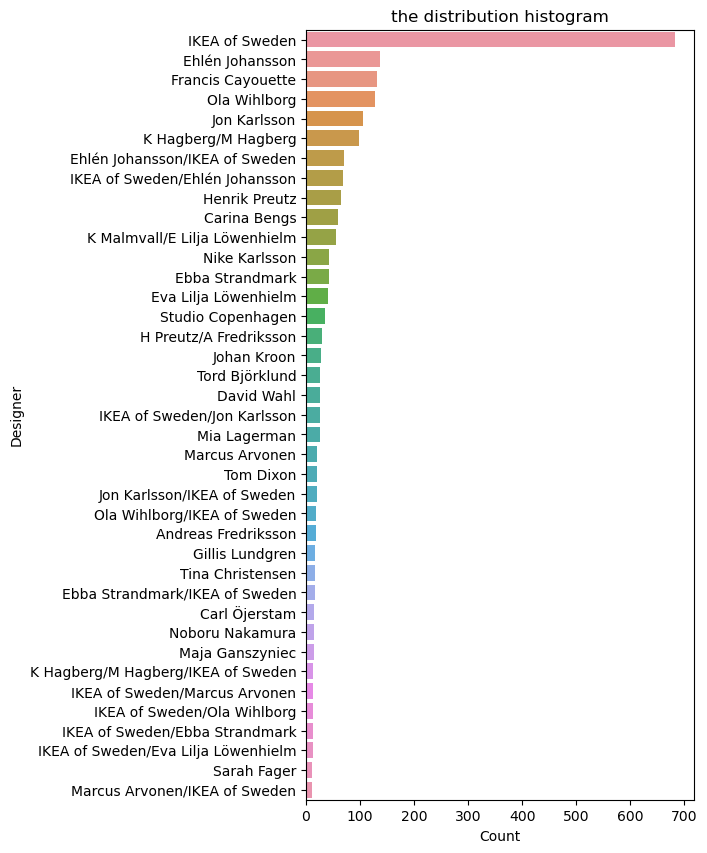

In [205]:
#Constructing a histogram for the designer column
fig,ax=plt.subplots(figsize=(5,10))
sns.barplot(x=count_designer.values,y=count_designer.index)
ax.set_ylabel('Designer')
ax.set_xlabel('Count')
ax.set_title('the distribution histogram')
plt.show()

<h2>Old price<h2\>

In [206]:
# A query to select the old_price column
cursor.execute("""SELECT old_price
                FROM all_data_without_duplicate
                WHERE old_price!='0'""")
exer2_1= cursor.fetchall()
exer2_1=pd.DataFrame(exer2_1,columns=['old_price'])
exer2_1['old_price'] = exer2_1['old_price'].astype(float)
print(exer2_1)
# Descriptive statistics of the "old_price" dataset
print(exer2_1.describe().round(2))

     old_price
0        250.0
1       3250.0
2         30.0
3         30.0
4         12.5
..         ...
569      360.0
570      885.0
571     2270.0
572      855.0
573      380.0

[574 rows x 1 columns]
       old_price
count     574.00
mean     1633.06
std      1814.51
min         2.50
25%       400.00
50%       995.00
75%      2172.50
max      9985.00


In [207]:
# Let's find the mode for the old_price.
from statistics import mode

mode = mode(exer2_1['old_price'])
print('mode ',mode) 

mode  595.0


Text(0.5, 1.0, 'the distribution histogram')

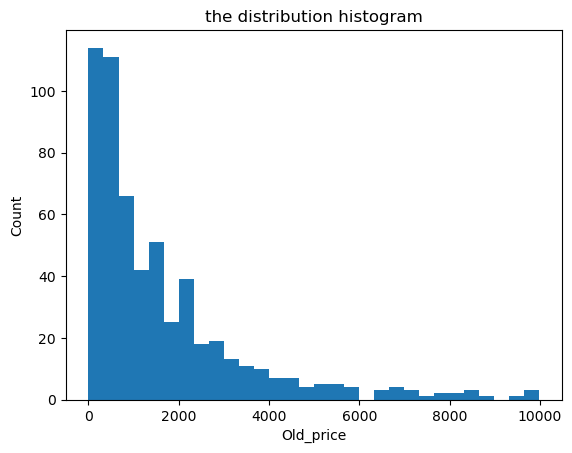

In [208]:
# Constructing a distribution histogram old_price
fig,ax=plt.subplots()
ax.hist(exer2_1['old_price'], bins=30)
ax.set_xlabel('Old_price')
ax.set_ylabel('Count')
ax.set_title('the distribution histogram')

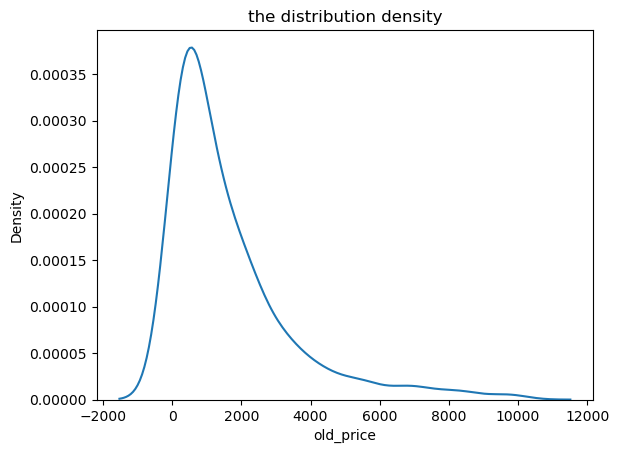

In [209]:
# Density plot old_price
fig,ax=plt.subplots()
sns.kdeplot(exer2_1['old_price'])
ax.set_title('the distribution density')
plt.show()

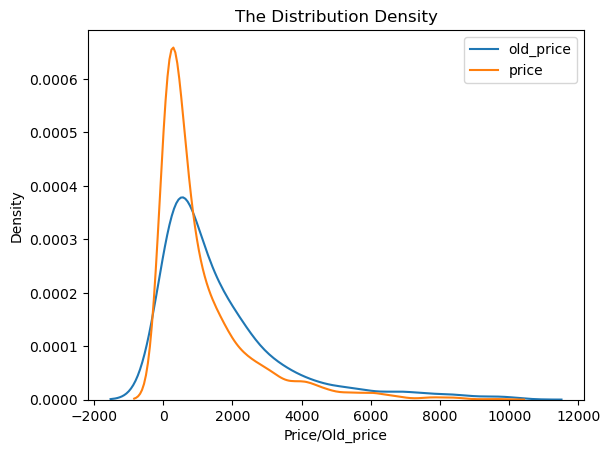

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.kdeplot(exer2_1['old_price'], label='old_price')
sns.kdeplot(exer2['price'], label='price')
ax.set_title('The Distribution Density')
ax.legend()
ax.set_xlabel('Price/Old_price')
plt.show()

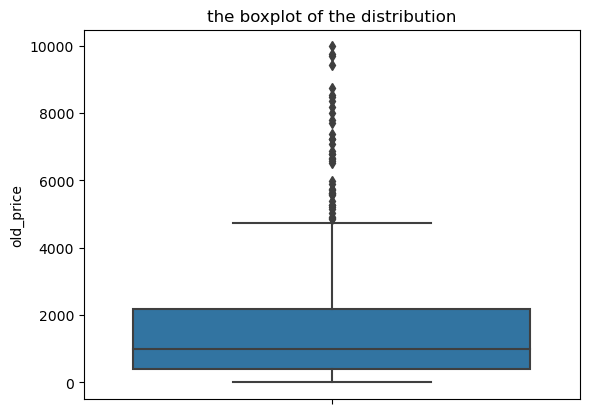

In [211]:
#Constructing boxplot old_price
fig,ax=plt.subplots()
sns.boxplot(y ='old_price', data=exer2_1)
ax.set_title('the boxplot of the distribution')
plt.show()

<h2>Depth, height, width<h2\>

In [212]:
import numpy
# A query to select  category, depth, height, width,price columns
cursor.execute("""SELECT category, price, depth, height, width
                FROM all_data_without_duplicate""")
exer3_1= cursor.fetchall()
exer3_1=pd.DataFrame(exer3_1,columns=['category','price','depth', 'height', 'width'])

print(exer3_1)

exer3_1['depth'] = exer3_1['depth'].fillna(value=numpy.nan).astype(float)
exer3_1['height'] = exer3_1['height'].fillna(value=numpy.nan).astype(float)
exer3_1['width'] = exer3_1['width'].fillna(value=numpy.nan).astype(float)
exer3_1['price'] = exer3_1['price'].astype(float)
print(exer3_1.info())


                        category  price depth height  width
0              Sofas & armchairs  150.0  None    7.0   60.0
1           Children's furniture  275.0  44.0   94.0   99.0
2                         Chairs   99.0  47.0   76.0   45.0
3                 Tables & desks   75.0  70.0   70.0   42.0
4           Cabinets & cupboards  295.0  37.0  163.0   43.0
...                          ...    ...   ...    ...    ...
2957           Outdoor furniture  619.0  None   None   None
2958  Bookcases & shelving units  609.0  36.0   None  202.0
2959  Bookcases & shelving units  296.0  41.0  197.0   86.0
2960              Tables & desks  385.0  None   73.0   60.0
2961              Tables & desks  265.0  None   74.0   60.0

[2962 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  2962 non-null   object 
 1   price     2962 non-null   f

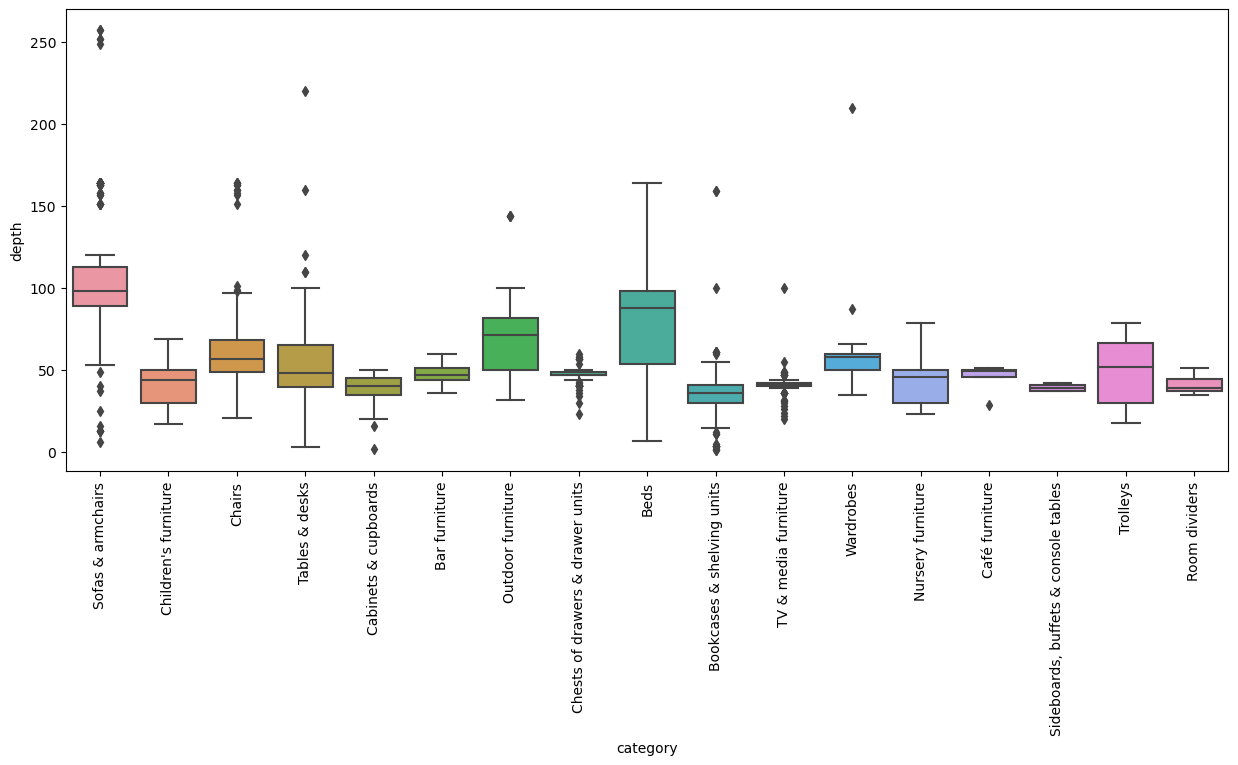

In [213]:
#Constructing a boxplot of depth by category
plt.subplots(figsize=(15,6))
sns.boxplot(x='category',y ='depth', data=exer3_1)
plt.xticks(rotation=90)
plt.show()

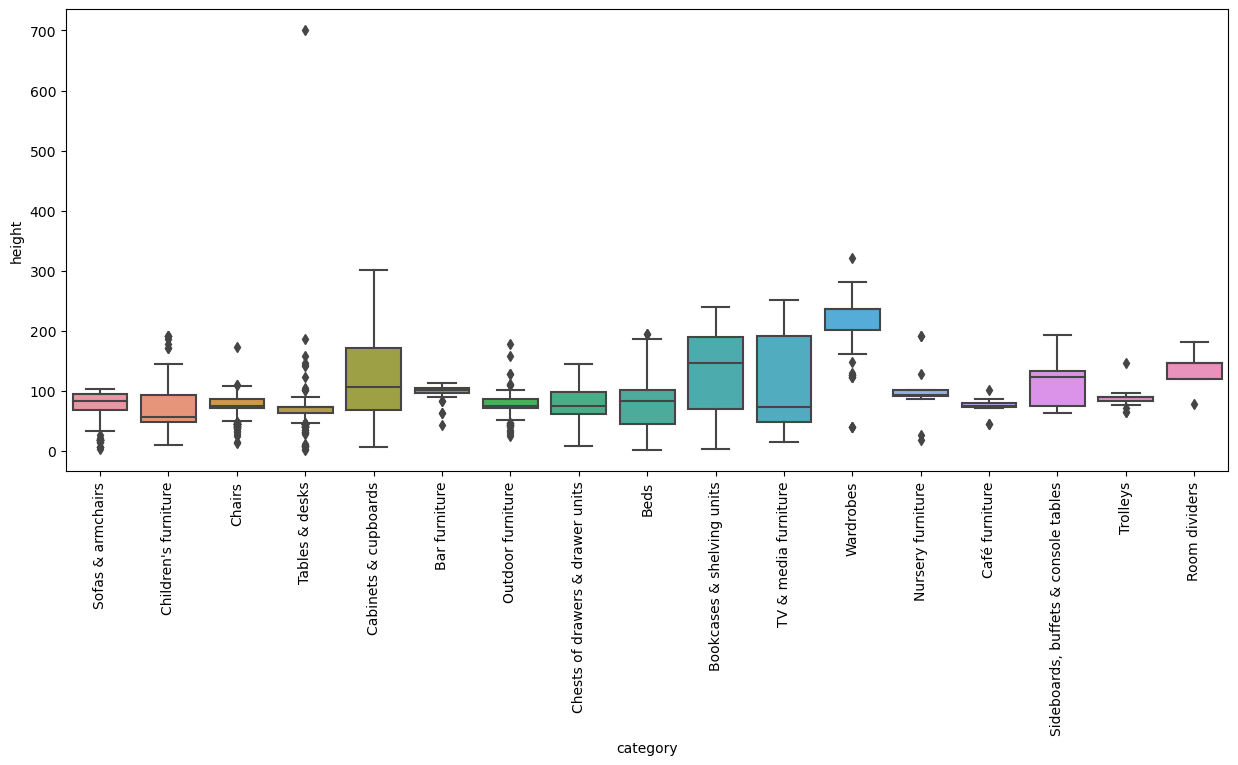

In [214]:
#Constructing a boxplot of height by category
plt.subplots(figsize=(15,6))
sns.boxplot(x='category',y ='height', data=exer3_1)
plt.xticks(rotation=90)
plt.show()

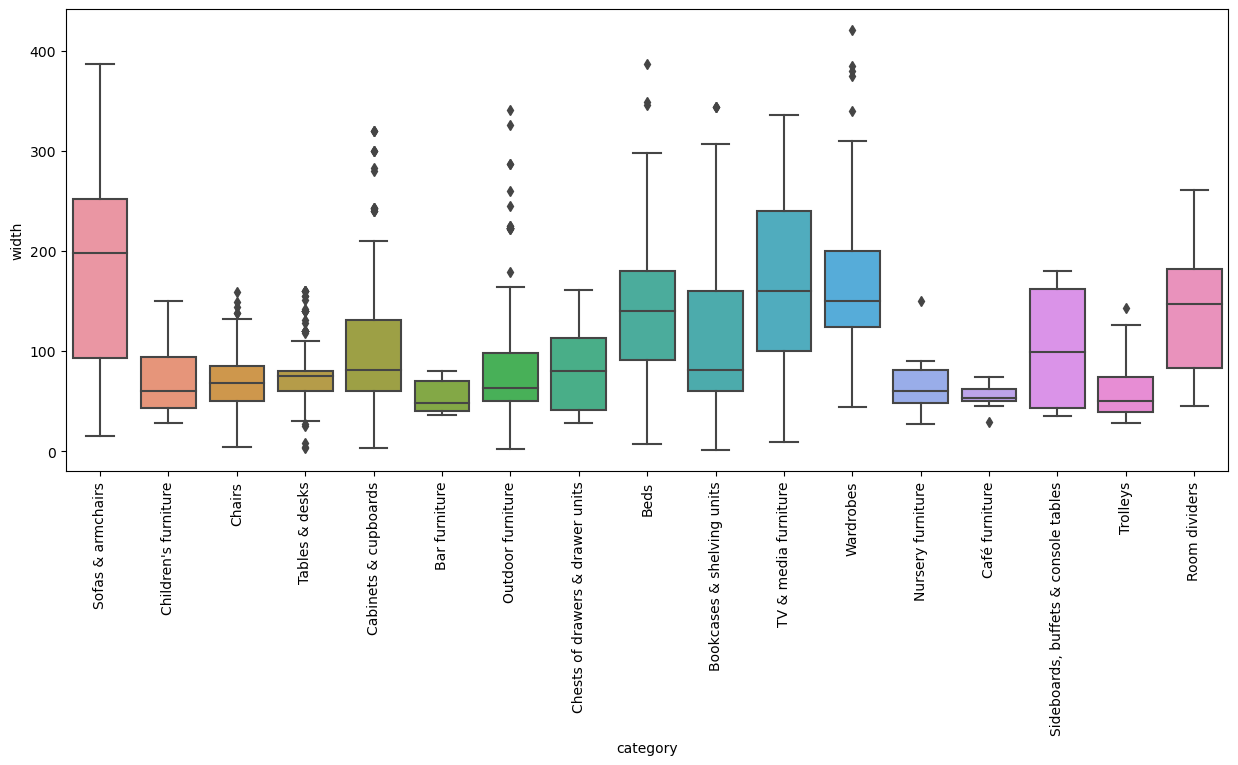

In [215]:
#Constructing a boxplot of width by category
plt.subplots(figsize=(15,6))
sns.boxplot(x='category',y ='width', data=exer3_1)
plt.xticks(rotation=90)
plt.show()

In [216]:
# Finding the averages
avg_parametr = exer3_1.groupby('category').agg(mean_depth=('depth', lambda x: x.mean(skipna=True)),
                                               mean_height=('height', lambda x: x.mean(skipna=True)),
                                              mean_width=('width', lambda x: x.mean(skipna=True)),
                                              median_depth=('depth', lambda x: x.median(skipna=True)),
                                               median_height=('height', lambda x: x.median(skipna=True)),
                                              median_width=('width', lambda x: x.median(skipna=True)))
avg_parametr = avg_parametr.round(2)

In [217]:
#Finding the volume
avg_parametr['volume'] = avg_parametr.apply(lambda row: row.mean_depth * row.mean_height * row.mean_width, axis=1)
avg_parametr['volume'] = avg_parametr.groupby('category')['volume'].prod()
avg_parametr['price'] = exer3_1.groupby('category')['price'].mean()
avg_parametr.round(2)

,mean_depth,mean_height,mean_width,median_depth,median_height,median_width,volume,price
category,,,,,,,,
Bar furniture,46.93,97.57,52.95,47.0,102.0,48.0,242455.94,679.55
Beds,81.73,82.85,141.98,88.0,84.0,140.0,961393.50,1647.43
Bookcases & shelving units,36.92,131.10,106.56,36.0,147.0,81.0,515772.99,519.42
Cabinets & cupboards,39.12,118.20,103.85,40.0,107.0,81.0,480200.74,1044.82
Café furniture,46.80,74.81,55.40,49.5,75.5,53.0,193961.38,426.72
Chairs,62.48,75.15,68.05,56.5,75.5,68.0,319520.06,1097.12
Chests of drawers & drawer units,46.81,79.72,80.68,47.0,75.0,80.0,301073.01,657.49
Children's furniture,41.97,78.26,68.16,44.0,56.5,60.0,223876.44,286.18
Nursery furniture,46.53,98.94,65.18,46.0,93.0,60.0,300067.75,431.77


In [218]:
avg_parametr = avg_parametr.sort_values(by='volume', ascending=False)
avg_parametr.round(2)

,mean_depth,mean_height,mean_width,median_depth,median_height,median_width,volume,price
category,,,,,,,,
Wardrobes,56.19,219.60,168.02,58.0,236.0,150.0,2073253.22,2249.02
Sofas & armchairs,108.14,77.08,188.32,98.0,83.0,198.5,1569728.40,1968.16
Beds,81.73,82.85,141.98,88.0,84.0,140.0,961393.50,1647.43
Room dividers,41.14,134.80,149.89,39.0,147.0,147.0,831240.78,912.60
TV & media furniture,40.91,110.49,164.94,41.0,74.0,160.0,745552.86,1045.65
Bookcases & shelving units,36.92,131.10,106.56,36.0,147.0,81.0,515772.99,519.42
Outdoor furniture,69.36,77.25,91.42,71.5,75.0,63.0,489833.85,919.76
Cabinets & cupboards,39.12,118.20,103.85,40.0,107.0,81.0,480200.74,1044.82
"Sideboards, buffets & console tables",39.14,113.70,105.20,39.0,123.0,99.0,468162.93,1013.00


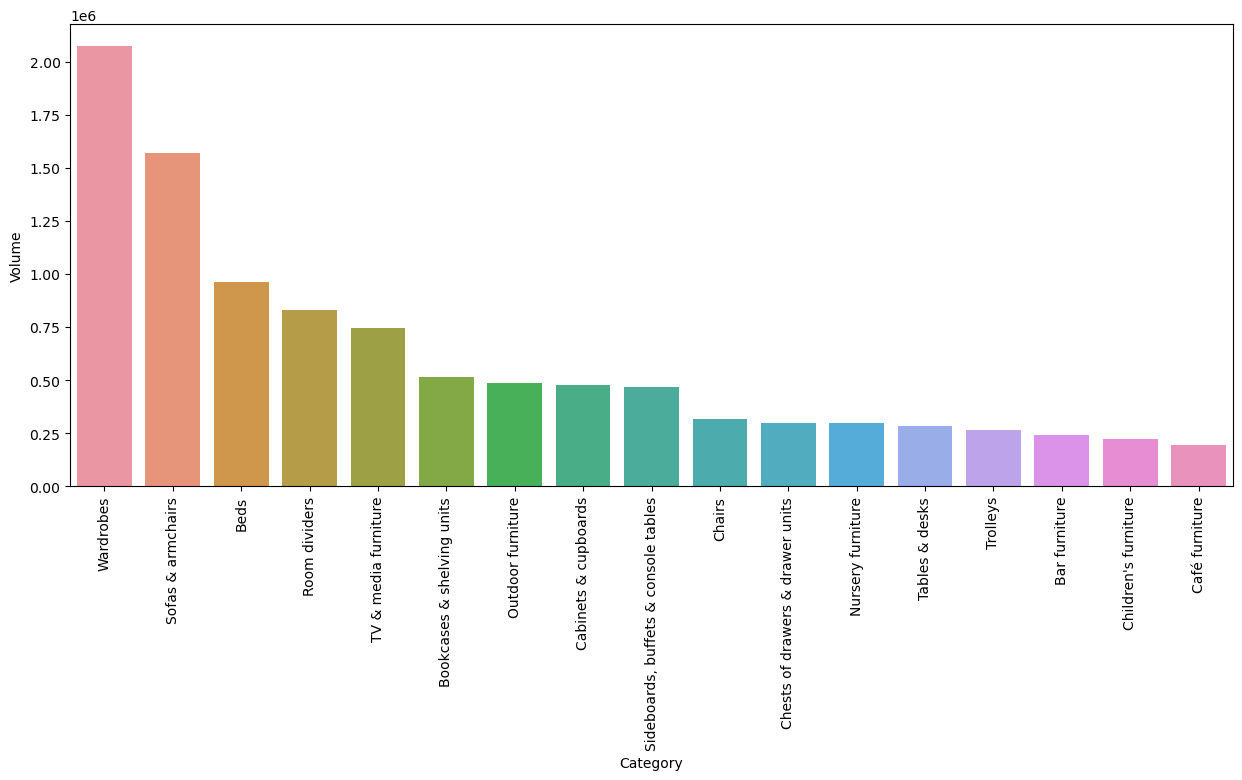

In [219]:
#Constructing barplot volume by category
plt.subplots(figsize=(15,6))
sns.barplot(x=avg_parametr.index, y=avg_parametr["volume"])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Volume")
plt.show()

<h3>Price vs depth, height, width <h3\>

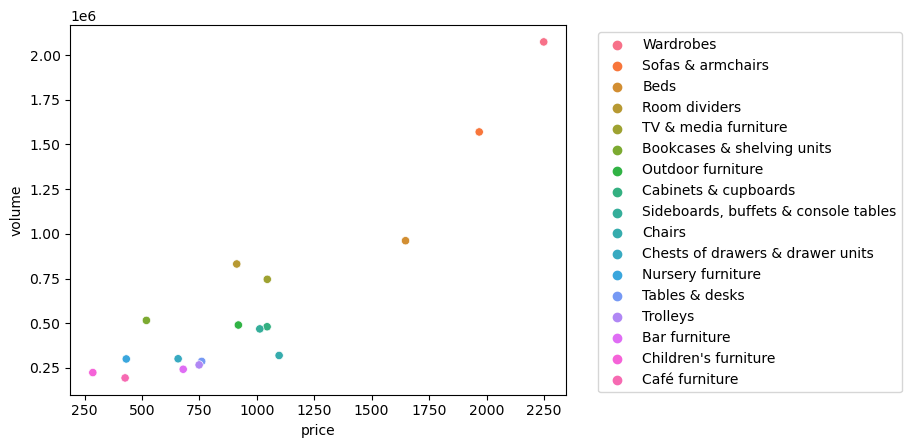

In [220]:
#Constructing scatterplot price and volume
sns.scatterplot(x='price',y ='volume', hue='category', data=avg_parametr)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [221]:
corr = avg_parametr[['price', 'volume']].corr().iloc[0, 1]
corr

0.911674744557904

<h3> Missing depth <h3\>

In [222]:
# a query to select columns item_id, category, and depth where depth is Null
cursor.execute("""SELECT item_id, category, depth
                FROM all_data_without_duplicate
                WHERE depth IS NULL""")
exer4= cursor.fetchall()
exer4=pd.DataFrame(exer4,columns=['item_id','category','depth'])
print(exer4)
# exer4['depth'] = exer4['depth'].fillna(value=numpy.nan).astype(float)
print(exer4.info())

       item_id              category depth
0     10052362     Sofas & armchairs  None
1     10135659                Chairs  None
2     10141170                Chairs  None
3     10150094                Chairs  None
4     10192013  Children's furniture  None
...        ...                   ...   ...
1113  99323925         Bar furniture  None
1114  99331384        Tables & desks  None
1115  99335985     Outdoor furniture  None
1116  99930961        Tables & desks  None
1117  99932615        Tables & desks  None

[1118 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   1118 non-null   object
 1   category  1118 non-null   object
 2   depth     0 non-null      object
dtypes: object(3)
memory usage: 26.3+ KB
None


In [223]:
# Replacing empty values with means.
exer4.loc[exer4['category']=="Children's furniture", 'depth'] = avg_parametr.loc[avg_parametr.index=="Children's furniture", 'mean_depth'].values[0]
exer4.loc[exer4['category']=="Bar furniture", 'depth'] = avg_parametr.loc[avg_parametr.index=="Bar furniture", 'mean_depth'].values[0]
exer4.loc[exer4['category']=="Outdoor furniture", 'depth'] = avg_parametr.loc[avg_parametr.index=="Outdoor furniture", 'mean_depth'].values[0]
exer4.loc[exer4['category']=="Trolleys", 'depth'] = avg_parametr.loc[avg_parametr.index=="Trolleys", 'mean_depth'].values[0]


In [224]:
# Replacing empty values with medians
exer4.loc[exer4['category']=="Sofas & armchairs", 'depth'] = avg_parametr.loc[avg_parametr.index=="Sofas & armchairs", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Cabinets & cupboards", 'depth'] = avg_parametr.loc[avg_parametr.index=="Cabinets & cupboards", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Chairs", 'depth'] = avg_parametr.loc[avg_parametr.index=="Chairs", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Tables & desks", 'depth'] = avg_parametr.loc[avg_parametr.index=="Tables & desks", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Chests of drawers & drawer units", 'depth'] = avg_parametr.loc[avg_parametr.index=="Chests of drawers & drawer units", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Beds", 'depth'] = avg_parametr.loc[avg_parametr.index=="Beds", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Bookcases & shelving units", 'depth'] = avg_parametr.loc[avg_parametr.index=="Bookcases & shelving units", 'median_depth'].values[0]
exer4.loc[exer4['category']=="TV & media furniture", 'depth'] = avg_parametr.loc[avg_parametr.index=="TV & media furniture", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Wardrobes", 'depth'] = avg_parametr.loc[avg_parametr.index=="Wardrobes", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Nursery furniture", 'depth'] = avg_parametr.loc[avg_parametr.index=="Nursery furniture", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Café furniture", 'depth'] = avg_parametr.loc[avg_parametr.index=="Café furniture", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Sideboards, buffets & console tables", 'depth'] = avg_parametr.loc[avg_parametr.index=="Sideboards, buffets & console tables", 'median_depth'].values[0]
exer4.loc[exer4['category']=="Room dividers", 'depth'] = avg_parametr.loc[avg_parametr.index=="Room dividers", 'median_depth'].values[0]


In [225]:
exer4=exer4.sort_values(by='depth', ascending=False)
print(exer4)
exer4.info()

      item_id                    category depth
0    10052362           Sofas & armchairs  98.0
564  50363970           Sofas & armchairs  98.0
919  80425212           Sofas & armchairs  98.0
827  79217921           Sofas & armchairs  98.0
576  50418053           Sofas & armchairs  98.0
..        ...                         ...   ...
289  30323367  Bookcases & shelving units  36.0
981  90226797  Bookcases & shelving units  36.0
290  30323598  Bookcases & shelving units  36.0
291  30333286  Bookcases & shelving units  36.0
559  50347503  Bookcases & shelving units  36.0

[1118 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 0 to 559
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   1118 non-null   object
 1   category  1118 non-null   object
 2   depth     1118 non-null   object
dtypes: object(3)
memory usage: 34.9+ KB


In [226]:
# Let's write the filled values of the depth column into the table named NEW_data.
conn = sqlite3.connect('sql_step_project.db')
conn.execute('BEGIN TRANSACTION')
for index, row in exer4.iterrows():
    item_id=row['item_id']
    category = row['category']
    depth = row['depth']
    conn.execute('UPDATE NEW_data SET depth_new = ? WHERE item_id = ? AND category = ?', (depth, item_id, category))
conn.commit()

<h3> Missing height <h3\>

In [227]:
# A query to select columns item_id, category, and height where height is Null
cursor.execute("""SELECT item_id, category, height
                FROM all_data_without_duplicate
                WHERE height IS NULL""")
exer4_1= cursor.fetchall()
exer4_1=pd.DataFrame(exer4_1,columns=['item_id','category','height'])
print(exer4_1)
# exer4['depth'] = exer4['depth'].fillna(value=numpy.nan).astype(float)
print(exer4_1.info())

      item_id                    category height
0    10135659                      Chairs   None
1    10141170                      Chairs   None
2    10150094                      Chairs   None
3    10192013        Children's furniture   None
4      102065                        Beds   None
..        ...                         ...    ...
721  99305158                      Chairs   None
722  99305177                      Chairs   None
723  99331384              Tables & desks   None
724  99335985           Outdoor furniture   None
725  99902661  Bookcases & shelving units   None

[726 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   726 non-null    object
 1   category  726 non-null    object
 2   height    0 non-null      object
dtypes: object(3)
memory usage: 17.1+ KB
None


In [228]:
# Replacing empty values with means
exer4_1.loc[exer4_1['category']=="Cabinets & cupboards", 'height'] = avg_parametr.loc[avg_parametr.index=="Cabinets & cupboards", 'mean_height'].values[0]
exer4_1.loc[exer4_1['category']=="Chests of drawers & drawer units", 'height'] = avg_parametr.loc[avg_parametr.index=="Chests of drawers & drawer units", 'mean_height'].values[0]
exer4_1.loc[exer4_1['category']=="Bookcases & shelving units", 'height'] = avg_parametr.loc[avg_parametr.index=="Bookcases & shelving units", 'mean_height'].values[0]



In [229]:
# Replacing empty values with medians
exer4_1.loc[exer4_1['category']=="Children's furniture", 'height'] = avg_parametr.loc[avg_parametr.index=="Children's furniture", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Bar furniture", 'height'] = avg_parametr.loc[avg_parametr.index=="Bar furniture", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Outdoor furniture", 'height'] = avg_parametr.loc[avg_parametr.index=="Outdoor furniture", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Trolleys", 'height'] = avg_parametr.loc[avg_parametr.index=="Trolleys", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Sofas & armchairs", 'height'] = avg_parametr.loc[avg_parametr.index=="Sofas & armchairs", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Chairs", 'height'] = avg_parametr.loc[avg_parametr.index=="Chairs", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Tables & desks", 'height'] = avg_parametr.loc[avg_parametr.index=="Tables & desks", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Beds", 'height'] = avg_parametr.loc[avg_parametr.index=="Beds", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="TV & media furniture", 'height'] = avg_parametr.loc[avg_parametr.index=="TV & media furniture", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Wardrobes", 'height'] = avg_parametr.loc[avg_parametr.index=="Wardrobes", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Nursery furniture", 'height'] = avg_parametr.loc[avg_parametr.index=="Nursery furniture", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Café furniture", 'height'] = avg_parametr.loc[avg_parametr.index=="Café furniture", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Sideboards, buffets & console tables", 'height'] = avg_parametr.loc[avg_parametr.index=="Sideboards, buffets & console tables", 'median_height'].values[0]
exer4_1.loc[exer4_1['category']=="Room dividers", 'height'] = avg_parametr.loc[avg_parametr.index=="Room dividers", 'median_height'].values[0]


In [230]:
# Let's write the filled values of the height column into the table named NEW_data
conn = sqlite3.connect('sql_step_project.db')
conn.execute('BEGIN TRANSACTION')
for index, row in exer4_1.iterrows():
    item_id=row['item_id']
    category = row['category']
    height = row['height']
    conn.execute('UPDATE NEW_data SET height_new = ? WHERE item_id = ? AND category = ?', (height, item_id, category))
conn.commit()

<h3> Missing width <h3\>

In [231]:
# A query to select columns item_id, category, and width where width is Null
cursor.execute("""SELECT item_id, category, width
                FROM all_data_without_duplicate
                WHERE width IS NULL""")
exer4_2= cursor.fetchall()
exer4_2=pd.DataFrame(exer4_2,columns=['item_id','category','width'])
print(exer4_2)
# exer4['depth'] = exer4['depth'].fillna(value=numpy.nan).astype(float)
print(exer4_2.info())

      item_id                    category width
0    10141170                      Chairs  None
1    10150094                      Chairs  None
2    10192013        Children's furniture  None
3      102065                        Beds  None
4    10209202                      Chairs  None
..        ...                         ...   ...
437  99239620           Sofas & armchairs  None
438  99275241                        Beds  None
439  99278956           Sofas & armchairs  None
440  99297634  Bookcases & shelving units  None
441  99335985           Outdoor furniture  None

[442 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   442 non-null    object
 1   category  442 non-null    object
 2   width     0 non-null      object
dtypes: object(3)
memory usage: 10.5+ KB
None


In [232]:
# Replacing empty values with means.
exer4_2.loc[exer4_2['category']=="Beds", 'width'] = avg_parametr.loc[avg_parametr.index=="Beds", 'mean_width'].values[0]
exer4_2.loc[exer4_2['category']=="Chairs", 'width'] = avg_parametr.loc[avg_parametr.index=="Chairs", 'mean_width'].values[0]
exer4_2.loc[exer4_2['category']=="TV & media furniture", 'width'] = avg_parametr.loc[avg_parametr.index=="TV & media furniture", 'mean_width'].values[0]




In [233]:
# Replacing empty values with medians
exer4_2.loc[exer4_2['category']=="Cabinets & cupboards", 'width'] = avg_parametr.loc[avg_parametr.index=="Cabinets & cupboards", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Chests of drawers & drawer units", 'width'] = avg_parametr.loc[avg_parametr.index=="Chests of drawers & drawer units", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Bookcases & shelving units", 'width'] = avg_parametr.loc[avg_parametr.index=="Bookcases & shelving units", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Children's furniture", 'width'] = avg_parametr.loc[avg_parametr.index=="Children's furniture", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Bar furniture", 'width'] = avg_parametr.loc[avg_parametr.index=="Bar furniture", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Outdoor furniture", 'width'] = avg_parametr.loc[avg_parametr.index=="Outdoor furniture", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Trolleys", 'width'] = avg_parametr.loc[avg_parametr.index=="Trolleys", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Sofas & armchairs", 'width'] = avg_parametr.loc[avg_parametr.index=="Sofas & armchairs", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Tables & desks", 'width'] = avg_parametr.loc[avg_parametr.index=="Tables & desks", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Wardrobes", 'width'] = avg_parametr.loc[avg_parametr.index=="Wardrobes", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Nursery furniture", 'width'] = avg_parametr.loc[avg_parametr.index=="Nursery furniture", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Café furniture", 'width'] = avg_parametr.loc[avg_parametr.index=="Café furniture", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Sideboards, buffets & console tables", 'width'] = avg_parametr.loc[avg_parametr.index=="Sideboards, buffets & console tables", 'median_width'].values[0]
exer4_2.loc[exer4_2['category']=="Room dividers", 'width'] = avg_parametr.loc[avg_parametr.index=="Room dividers", 'median_width'].values[0]


In [234]:
# Let's write the filled values of the width column into the table named NEW_data
conn = sqlite3.connect('sql_step_project.db')
conn.execute('BEGIN TRANSACTION')
for index, row in exer4_2.iterrows():
    item_id=row['item_id']
    category = row['category']
    width = row['width']
    conn.execute('UPDATE NEW_data SET width_new = ? WHERE item_id = ? AND category = ?', (width, item_id, category))
conn.commit()

<h2>Category vs price<h2\>

In [235]:
# Query for selecting columns category and price
cursor.execute("""SELECT category, price
                FROM all_data_without_duplicate""")
exer3= cursor.fetchall()
exer3=pd.DataFrame(exer3,columns=['category','price'])
exer3['price'] = exer3['price'].astype(float)
print(exer3.info())
# Description of the price column by category
print(exer3.groupby(['category'])['price'].mean().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  2962 non-null   object 
 1   price     2962 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.4+ KB
None
category
Bar furniture                            679.55
Beds                                    1647.43
Bookcases & shelving units               519.42
Cabinets & cupboards                    1044.82
Café furniture                           426.72
Chairs                                  1097.12
Chests of drawers & drawer units         657.49
Children's furniture                     286.18
Nursery furniture                        431.77
Outdoor furniture                        919.76
Room dividers                            912.60
Sideboards, buffets & console tables    1013.00
Sofas & armchairs                       1968.16
TV & media furniture                    1045.65

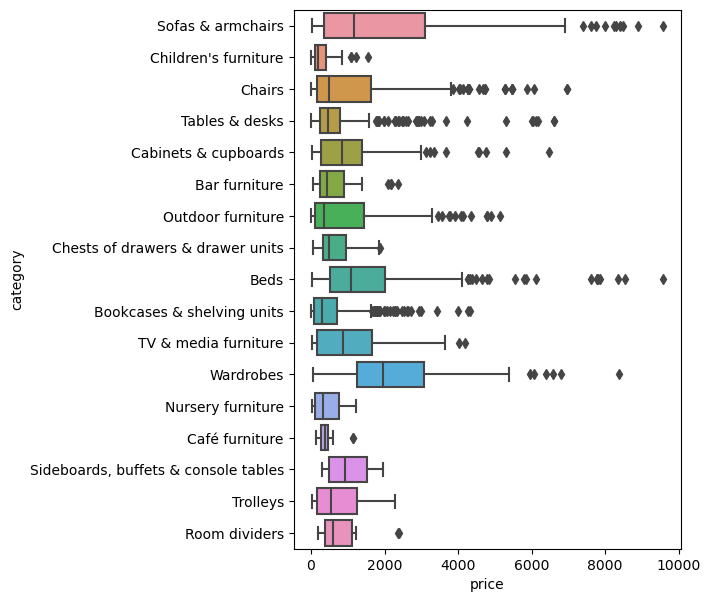

In [236]:
#побудова boxplot price за category
plt.subplots(figsize=(5,7))
sns.boxplot(x='price',y ='category', data=exer3)
plt.show()

<h2>Category vs designer<h2\>

In [237]:
# Query for selecting columns category,COUNT_empty_value where designer has empty values.
cursor.execute("""SELECT category , COUNT(designer) AS COUNT_empty_value
                   FROM all_data_without_duplicate 
                  WHERE designer=''
                  GROUP BY category
                  ORDER BY COUNT_empty_value DESC""")
exer6= cursor.fetchall()
exer6=pd.DataFrame(exer6,columns=['category','COUNT_empty_value'])
print(exer6)
print(exer6.info())
# кількість пустих комірок
print(exer6['COUNT_empty_value'].sum())

                           category  COUNT_empty_value
0        Bookcases & shelving units                 26
1                            Chairs                 23
2                 Sofas & armchairs                 20
3                    Tables & desks                 14
4              Cabinets & cupboards                  5
5                              Beds                  5
6              Children's furniture                  4
7              TV & media furniture                  3
8                 Outdoor furniture                  1
9  Chests of drawers & drawer units                  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           10 non-null     object
 1   COUNT_empty_value  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes
None
102


In [238]:
# Query for selecting columns category, designer for categories that have empty values in the designer column
cursor.execute("""SELECT category, designer, coun
                FROM designer_for_empty_3""")
exer6_1= cursor.fetchall()
exer6_1=pd.DataFrame(exer6_1,columns=['category','designer','count'])
print(exer6_1)
print(exer6_1.info())

                            category                            designer  \
0                               Beds                      IKEA of Sweden   
1                               Beds                        Ola Wihlborg   
2                               Beds  K Hagberg/M Hagberg/IKEA of Sweden   
3         Bookcases & shelving units                      IKEA of Sweden   
4         Bookcases & shelving units                   Francis Cayouette   
5         Bookcases & shelving units                        Jon Karlsson   
6               Cabinets & cupboards                      IKEA of Sweden   
7               Cabinets & cupboards                        Jon Karlsson   
8               Cabinets & cupboards                        Carina Bengs   
9                             Chairs                      IKEA of Sweden   
10                            Chairs                        Mia Lagerman   
11                            Chairs                       Nike Karlsson   
12  Chests o

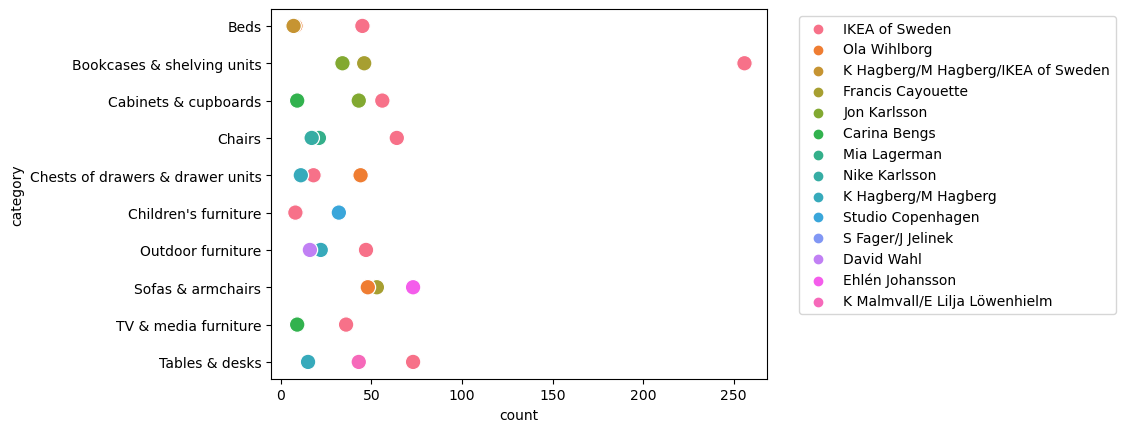

In [239]:
# Graph of the distribution of designer by category
sns.scatterplot(x='count',y ='category', hue='designer',data=exer6_1, s=125)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [240]:
# запит вибору стовпчика max  кількість (designer який найчастіше зустрічається), 
# також стовпчики category, designer
cursor.execute("""SELECT category, designer, max
                FROM designer_for_empty""")
exer6_2= cursor.fetchall()
exer6_2=pd.DataFrame(exer6_2,columns=['category','designer','max'])
print(exer6_2)
print(exer6_2.info())

                           category           designer  max
0        Bookcases & shelving units     IKEA of Sweden  256
1                 Sofas & armchairs    Ehlén Johansson   73
2                    Tables & desks     IKEA of Sweden   73
3                            Chairs     IKEA of Sweden   64
4              Cabinets & cupboards     IKEA of Sweden   56
5                 Outdoor furniture     IKEA of Sweden   47
6                              Beds     IKEA of Sweden   45
7  Chests of drawers & drawer units       Ola Wihlborg   44
8              TV & media furniture     IKEA of Sweden   36
9              Children's furniture  Studio Copenhagen   32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   designer  10 non-null     object
 2   max       10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ 

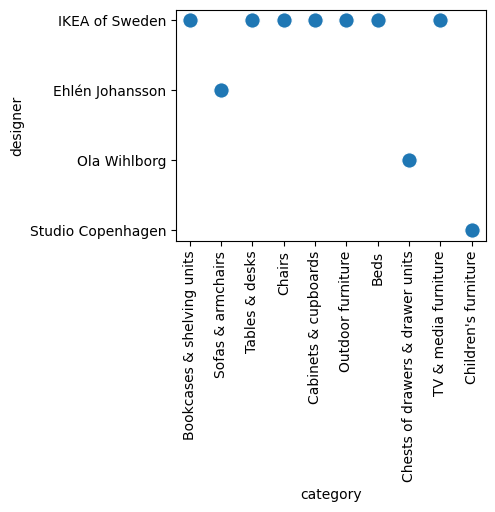

In [241]:
# Graph of the distribution of designer by category
plt.subplots(figsize=(4,3))
sns.scatterplot(x='category',y ='designer',data=exer6_2, s=125)
plt.xticks(rotation=90)
plt.show()

<h3> Missing designer <h3\>

In [242]:
# Query for selecting columns item_id, category, designer, where designer values are empty
cursor.execute("""SELECT item_id, category , designer
                   FROM all_data_without_duplicate 
                   WHERE designer=''
                  """)
exer6_3= cursor.fetchall()
exer6_3=pd.DataFrame(exer6_3,columns=['item_id', 'category' , 'designer'])
print(exer6_3.sort_values(by='designer', ascending=True))
print(exer6_3.info())

      item_id                    category designer
0    10294511        TV & media furniture         
73   70443626  Bookcases & shelving units         
72   70441566  Bookcases & shelving units         
71   70428904  Bookcases & shelving units         
70   70299879  Bookcases & shelving units         
..        ...                         ...      ...
29   30428915        Cabinets & cupboards         
28   30428901        Cabinets & cupboards         
27   30415625              Tables & desks         
37     385069                      Chairs         
101  99239620           Sofas & armchairs         

[102 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   102 non-null    object
 1   category  102 non-null    object
 2   designer  102 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB
None


In [243]:
# Filling in missing values of designer with the most frequently occurring designers for each category
for index, row in exer6_3.iterrows():
    category = row['category']
    designer = exer6_2.loc[exer6_2['category'] == category, 'designer'].iloc[0]
    exer6_3.at[index, 'designer'] = designer


In [244]:
exer6_3.sort_values(by='designer', ascending=True)

,item_id,category,designer
101,99239620,Sofas & armchairs,Ehlén Johansson
30,30433790,Sofas & armchairs,Ehlén Johansson
77,79239635,Sofas & armchairs,Ehlén Johansson
36,382594,Sofas & armchairs,Ehlén Johansson
81,80382608,Sofas & armchairs,Ehlén Johansson
...,...,...,...
87,80433486,Chests of drawers & drawer units,Ola Wihlborg
46,40466285,Children's furniture,Studio Copenhagen
33,30466281,Children's furniture,Studio Copenhagen
58,50466275,Children's furniture,Studio Copenhagen


In [245]:
# Let's write the filled values of the designer column to the table named NEW_data.
conn = sqlite3.connect('sql_step_project.db')
conn.execute('BEGIN TRANSACTION')
for index, row in exer6_3.iterrows():
    item_id=row['item_id']
    category = row['category']
    designer = row['designer']
    conn.execute('UPDATE NEW_data SET designer_new = ? WHERE item_id = ? AND category = ?', (designer, item_id, category))
conn.commit()

<h2>Designer vs price<h2\>

In [246]:
# Query for selecting columns category,designer, and price
cursor.execute("""SELECT category, designer, price
                FROM all_data_without_duplicate
                WHERE designer!=''""")
exer7= cursor.fetchall()
exer7=pd.DataFrame(exer7,columns=['category','designer','price'])
exer7['price'] = exer7['price'].astype(float)
print(exer7.info())
# Description of the price column by category
print(exer7.groupby(['designer'])['price'].mean().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  2860 non-null   object 
 1   designer  2860 non-null   object 
 2   price     2860 non-null   float64
dtypes: float64(1), object(2)
memory usage: 67.2+ KB
None
designer
A Fredriksson/J Hultqvist/W Chong     406.50
A Huldén/S Dahlman                     55.00
Andreas Fredriksson                  1383.61
Anna Efverlund                        525.00
Anna Palleschitz                      822.50
                                      ...   
Tom Dixon/IKEA of Sweden             2395.00
Tord Björklund                        528.08
Tord Björklund/IKEA of Sweden        3253.00
Virgil Abloh                          501.60
Wiebke Braasch                        410.00
Name: price, Length: 279, dtype: float64


<h2>ANOVA test for the dependence of price on two factors, category and designer. <h2\>

In [248]:
# Mean price value for each designer within each category
mean_des_in_categor=exer7.groupby(['category','designer'])['price'].mean().round(2)
print(mean_des_in_categor)

category       designer                                   
Bar furniture  Carina Bengs                                    370.00
               Ehlén Johansson                                1149.89
               Francis Cayouette                              1121.67
               Henrik Preutz                                    69.00
               IKEA of Sweden                                  257.50
                                                               ...   
Wardrobes      L Hilland/J Karlsson                            945.00
               Ola Wihlborg                                    648.67
               Ola Wihlborg/Ehlén Johansson/IKEA of Sweden    3935.00
               Ola Wihlborg/IKEA of Sweden                    1397.95
               T Winkel/T Jacobsen                            1270.00
Name: price, Length: 558, dtype: float64


In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# We define the formula for the model
formula = 'price ~ C(category) + C(designer) + C(category):C(designer)'

# We create the model and calculate the ANOVA
model = ols(formula, data=exer7).fit()
table = sm.stats.anova_lm(model, typ=2)

# We display the results of ANOVA
print(table)

C:\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 278, but rank is 25
  warnings.warn('covariance of constraints does not have full '


                               sum_sq      df             F         PR(>F)
C(category)             -1.459431e+01    16.0 -9.353310e-07   1.000000e+00
C(designer)             -6.537808e+09   278.0 -2.411510e+01   1.000000e+00
C(category):C(designer)  2.232818e+10  4448.0  5.147428e+00  1.266065e-168
Residual                 2.244935e+09  2302.0           NaN            NaN


C:\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4448, but rank is 537
  warnings.warn('covariance of constraints does not have full '


The result displays the sum of squares, degrees of freedom, F-statistic, and p-value for three sources of variation: category, designer, and the interaction between category and designer (category: designer). The null hypothesis for the ANOVA test is that all group means are equal.

The p-value for the interaction effect (category: designer) is very small (1.266065e-168), indicating a significant influence of the interaction between category and designer on price. In other words, the impact of the designer on price depends on the category, and vice versa.

The p-values for the main effects of category and designer are both 1, implying that there is no significant difference in price among categories or designers after controlling for other factors. However, this result should be interpreted cautiously, as the significant interaction effect suggests that the relationship between price, category, and designer is more complex than simple mean comparisons.

In summary, the ANOVA test reveals a significant interaction effect between category and designer on price, while there is no significant main effect of category or designer on price.

In [249]:
grouped_data=exer7

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


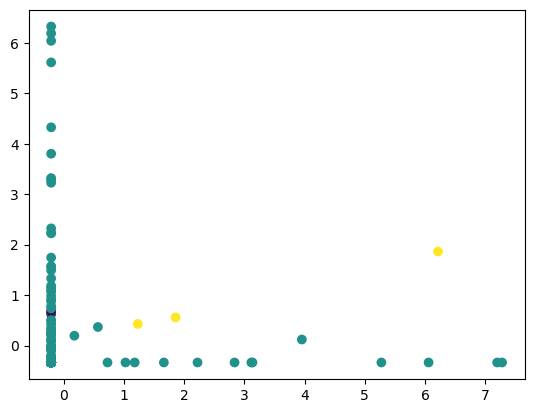

In [250]:
# Clusters of designer dependencies within groups
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Creation of the feature matrix
features = pd.pivot_table(grouped_data, values='price', index=['designer'], columns=['category']).fillna(0)

# Data standardization
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Clustering using the K-means method
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_std)
labels = kmeans.predict(features_std)

# Visualization of clustering results
plt.scatter(features_std[:, 0], features_std[:, 1], c=labels, cmap='viridis')
plt.show()

The plot visualizes how different designers are distributed in a two-dimensional space based on their characteristics (in our example, the average price of items in different categories). Each point on the plot corresponds to a single designer. Designers that are located close to each other have similar characteristics. Therefore, the plot can help identify groups of similar designers who might share common attributes in their work. Each color on this plot corresponds to a distinct cluster. Clustering identifies groups of similar objects and assigns them a common color. As a result, the colors indicate which designers belong to the same group based on their work across different categories.

<h2>Price vs old price <h2\>

In [251]:
# Query to select columns category, price, and old_price
cursor.execute("""SELECT item_id,category, price, old_price
                FROM all_data_without_duplicate""")
exer5= cursor.fetchall()
exer5=pd.DataFrame(exer5,columns=['item_id','category','price','old_price'])
print(exer5)
exer5['old_price'] = exer5['old_price'].astype(float)
exer5['price'] = exer5['price'].astype(float)
print(exer5.info())

       item_id                    category  price old_price
0     10052362           Sofas & armchairs  150.0       250
1     10091453        Children's furniture  275.0         0
2     10115067                      Chairs   99.0         0
3     10118971              Tables & desks   75.0         0
4     10119206        Cabinets & cupboards  295.0         0
...        ...                         ...    ...       ...
2957  99335985           Outdoor furniture  619.0       855
2958  99902661  Bookcases & shelving units  609.0         0
2959  99903788  Bookcases & shelving units  296.0       380
2960  99930961              Tables & desks  385.0         0
2961  99932615              Tables & desks  265.0         0

[2962 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    2962 non-null   object 
 1   category   2962 non-null

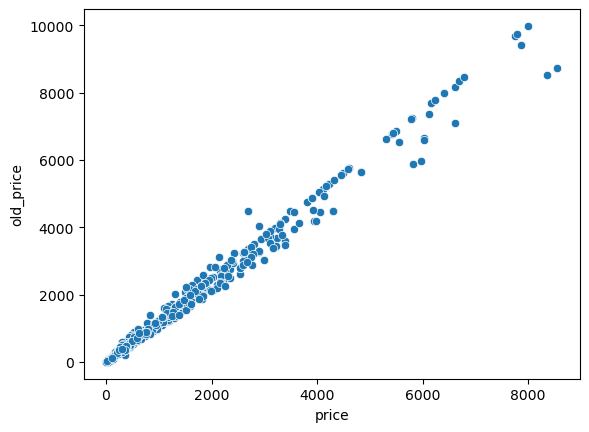

In [252]:
exer5_1=exer5[exer5['old_price']!=0]
exer5_2=exer5[exer5['old_price']==0]
#creating scatterplot price за old_price 
sns.scatterplot(x='price',y ='old_price', data=exer5_1)
plt.show()

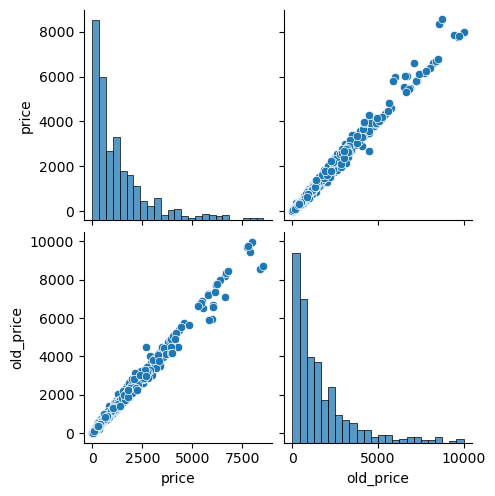

In [253]:
sns.pairplot(exer5_1)

In [254]:
corr = exer5_1.corr()
corr

C:\Users\user\AppData\Local\Temp\ipykernel_4156\4266957897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = exer5_1.corr()


,price,old_price
price,1.000000,0.993705
old_price,0.993705,1.000000


In [255]:
import numpy as np
from scipy.stats import pearsonr

 # Calculation of Pearson's correlation coefficient and p-value (for testing statistical significance):
correlation_coefficient, p_value = pearsonr(exer5_1['old_price'], exer5_1['price'])

print("correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

 # Calculation of Pearson's correlation coefficient and p-value (for testing statistical significance):
if p_value < 0.05:  #підходящий рівень значущості 
    print("Statistically significant dependency")
else:
    print("The dependency is not statistically significant")

correlation coefficient: 0.9937052030377374
p-value: 0.0
Statistically significant dependency


<h3>Missing old price<h3\>

In [256]:
#Separately storing the data from 'old_price' that are not equal to and equal to 0.
X=exer5_1['price'].values.reshape(-1, 1)
y=exer5_1['old_price']

#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [257]:
# Building a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [258]:
#Testing the model
y_pred=model.predict(X_test)

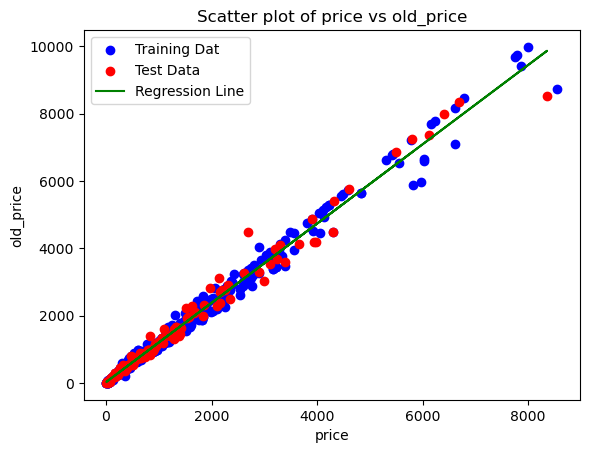

In [259]:
# Graphical representation of the model
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='blue', label='Training Dat')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Line of best fit for the test data
plt.plot(X_test, y_pred, color='green', label='Regression Line')

# Add axis labels and title
plt.xlabel('price')
plt.ylabel('old_price')
plt.title('Scatter plot of price vs old_price')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [260]:
# Model validation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.98331845721843

If the coefficient of determination (R-squared) is close to 1, then there may be a linear relationship between the two variables.

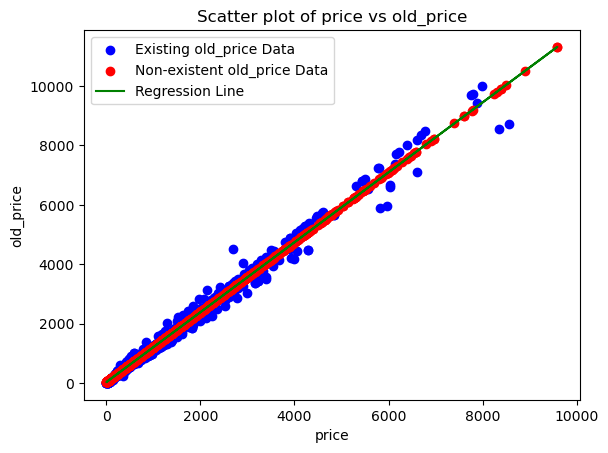

In [261]:
plot_x=exer5_2['price'].values.reshape(-1, 1)
plot_y=model.predict(plot_x)

plt.scatter(X, y, color='blue', label='Existing old_price Data')
plt.scatter(plot_x, plot_y, color='red', label='Non-existent old_price Data')

# Line of best fit for the test data
plt.plot(plot_x, plot_y, color='green', label='Regression Line')

# Add axis labels and title
plt.xlabel('price')
plt.ylabel('old_price')
plt.title('Scatter plot of price vs old_price')

# Add legend
plt.legend()

# Show the plot
plt.show()




In [262]:
plot_y=model.predict(plot_x)
plot_y

array([350.04409999, 142.74841553, 114.4808222 , ..., 743.43477392,
       479.60390278, 338.26593611])

In [263]:
# Let's record the predicted values into the dataframe exer5
exer5.loc[exer5['old_price'] == 0.0, 'old_price'] = plot_y.reshape(-1, 1)

In [264]:
print(exer5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    2962 non-null   object 
 1   category   2962 non-null   object 
 2   price      2962 non-null   float64
 3   old_price  2962 non-null   float64
dtypes: float64(2), object(2)
memory usage: 92.7+ KB
None


In [265]:
# Let's record the predicted values of the old_price column into the NEW_data table.
conn = sqlite3.connect('sql_step_project.db')
conn.execute('BEGIN TRANSACTION')
for index, row in exer5.iterrows():
    item_id=row['item_id']
    category = row['category']
    old_price = row['old_price']
    conn.execute('UPDATE NEW_data SET old_price_predict = ? WHERE item_id = ? AND category = ?', 
                 (old_price, item_id, category))
conn.commit()

<h1> Price prediction model <h1\>

In [266]:
# The column selection query necessary for creating the model
cursor.execute("""SELECT name,category, price, old_price_predict,designer_new, depth_new, height_new, width_new  
                FROM NEW_data""")
exer8= cursor.fetchall()
exer8=pd.DataFrame(exer8,columns=['name','category', 'price', 'old_price_predict','designer_new', 'depth_new',
                                  'height_new', 'width_new'])
print(exer8.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2962 entries, 0 to 2961
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               2962 non-null   object 
 1   category           2962 non-null   object 
 2   price              2962 non-null   float64
 3   old_price_predict  2962 non-null   float64
 4   designer_new       2962 non-null   object 
 5   depth_new          2962 non-null   float64
 6   height_new         2962 non-null   float64
 7   width_new          2962 non-null   float64
dtypes: float64(5), object(3)
memory usage: 185.2+ KB
None


In [267]:
# Selection of data for model creation
X=exer8[['category','old_price_predict', 'depth_new','height_new', 'width_new']]
y=exer8['price']

In [268]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [269]:
# Creation of a prediction model based on DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
       ('onehot', OneHotEncoder())])
column_preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer,['old_price_predict', 'depth_new','height_new', 'width_new']),
    ('categorical', categorical_transformer,['category'])])
clf = Pipeline(steps=[
    ('preprocessing', column_preprocessing),
    ('clf', DecisionTreeRegressor())])

In [272]:
# Validation and tuning of the best strategy (max_depth)
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(estimator=clf, 
                        param_grid = {'clf__max_depth': [None,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]})
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)
clf.fit(X_train, y_train)
mean_squared_error(y_test,clf.predict(X_test))

{'clf__max_depth': 6}
0.994384451222454


7138.919038981761

In [273]:
# Creating a prediction model based on the DecisionTreeRegressor with the best strategy, where max_depth=6
numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
       ('onehot', OneHotEncoder())])
column_preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer,['old_price_predict', 'depth_new','height_new', 'width_new']),
    ('categorical', categorical_transformer,['category'])])
clf = Pipeline(steps=[
    ('preprocessing', column_preprocessing),
    ('clf', DecisionTreeRegressor(max_depth=6))])

In [275]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean())
clf.fit(X_train,y_train)
mean_squared_error(y_test,clf.predict(X_test))

[0.99647932 0.99627524 0.99716491 0.99369414 0.99588228]
0.9958991791333176


6251.934538140453

In [276]:
# Creating a prediction model based on KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
       ('onehot', OneHotEncoder())])
column_preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer,['old_price_predict', 'depth_new','height_new', 'width_new']),
    ('categorical', categorical_transformer,['category'])])
model = Pipeline(steps=[
    ('preprocessing', column_preprocessing),
    ('reg', KNeighborsRegressor())])

In [277]:
# Validation and tuning of the best strategy 
# Find the best value of "k"
from sklearn.metrics import accuracy_score
for k in range(1, 21):
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
    column_preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer,['old_price_predict', 'depth_new','height_new', 'width_new']),
    ('categorical', categorical_transformer,['category'])])
    model = Pipeline(steps=[
    ('preprocessing', column_preprocessing),
    ('reg', KNeighborsRegressor(n_neighbors=k))])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    msr = mean_squared_error(y_test,model.predict(X_test))
    print("k:", k, "mean_squared_error:", msr)

k: 1 mean_squared_error: 48750.41018893388
k: 2 mean_squared_error: 44375.346403508775
k: 3 mean_squared_error: 47030.87008846904
k: 4 mean_squared_error: 50628.564908906876
k: 5 mean_squared_error: 51694.094146828604
k: 6 mean_squared_error: 56406.44885252661
k: 7 mean_squared_error: 60971.743863229494
k: 8 mean_squared_error: 64782.11966683536
k: 9 mean_squared_error: 67683.93469652288
k: 10 mean_squared_error: 68932.15776788123
k: 11 mean_squared_error: 72747.71078562585
k: 12 mean_squared_error: 74327.66305967911
k: 13 mean_squared_error: 77093.87382195817
k: 14 mean_squared_error: 79961.02144482083
k: 15 mean_squared_error: 80640.75020266905
k: 16 mean_squared_error: 82403.86288477352
k: 17 mean_squared_error: 84698.86116591719
k: 18 mean_squared_error: 87979.8723264774
k: 19 mean_squared_error: 89546.41890781716
k: 20 mean_squared_error: 92571.42932260458


In [278]:
# Creating a prediction model based on KNeighborsRegressor with the best strategy, n_neighbors=2
numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
       ('onehot', OneHotEncoder())])
column_preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer,['old_price_predict', 'depth_new','height_new', 'width_new']),
    ('categorical', categorical_transformer,['category'])])
model = Pipeline(steps=[
    ('preprocessing', column_preprocessing),
    ('reg', KNeighborsRegressor(n_neighbors=2))])

In [279]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(scores.mean())
model.fit(X_train,y_train)
mean_squared_error(y_test,model.predict(X_test))

[0.963896   0.97760414 0.97834686 0.97331423 0.97305154]
0.9732425530314609


44375.346403508775

<h2> Приклад передбачення <h2\>

In [281]:
# Data for prediction
new_data = pd.DataFrame({
    'category': ['Chairs'],
    'old_price_predict': [320],
    'depth_new': [50],
    'height_new': [80],
    'width_new': [40]    
})
# Prediction using the DecisionTreeRegressor model
Price_new=clf.predict(new_data)
Price_new.round(1)

array([238.6])

In [282]:
# Prediction using the KNeighborsRegressor model
Price_new_1=model.predict(new_data)
Price_new_1.round(1)

array([198.5])